In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Large Random Samples

In [3]:
united = Table.read_table('data/united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


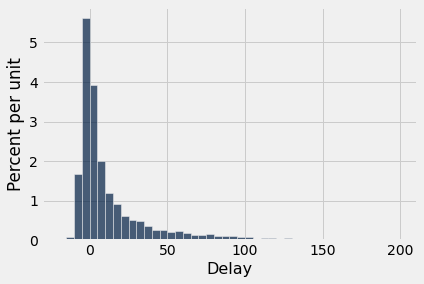

In [6]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

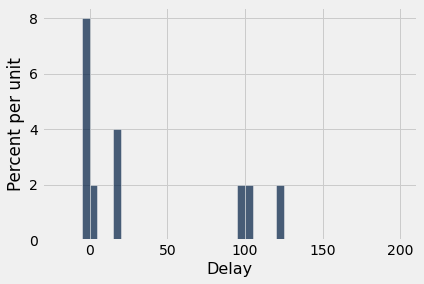

In [7]:
# (Sample) Empirical Distribution
united.sample(10).hist('Delay', bins = united_bins)

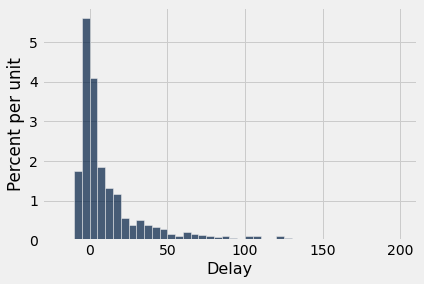

In [8]:
# (Sample) Empirical Distribution
united.sample(1000).hist('Delay', bins = united_bins)

## Statistics

In [9]:
# (Population) Parameter
np.median(united.column('Delay'))
# our median flight delay is 2 minutes, this is a population parameter

2.0

In [13]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

1.5

In [17]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))

1.0

### Probability & Empirical Distributions of a Statistic

In [18]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [19]:
sample_median(10)
# sample size of 10
# sample statistic is a median flight delay of 1 minutes

1.0

In [20]:
sample_median(20)
# sample size of 20
# sample statistic is a median flight delay of 0 minutes

0.0

In [21]:
num_simulations = 2000

In [22]:
sample_medians = make_array()

for i in np.arange(num_simulations): #np.arange(2000) = (0, 1...1999); i = 0, 1, ...1999
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median) # sample medians array should be 2000 elements long

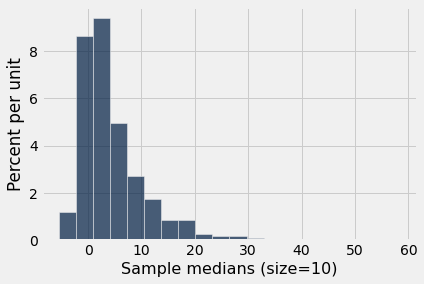

In [24]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)
# empirical distribution of our sample statistics
# we generated samples of size 10, 2000 times
# each time we recorded the median flight
# in the distribution below, is the collection of all median flights from a sample size 10

# looks like my median flight delays were between -20 and 35 minutes late
# with a bunch of the median flights falling around 0-10 minutes late

# remember, we are trying to estimate the population parameter of the 
# median flight delay being 2 minutes late

In [25]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

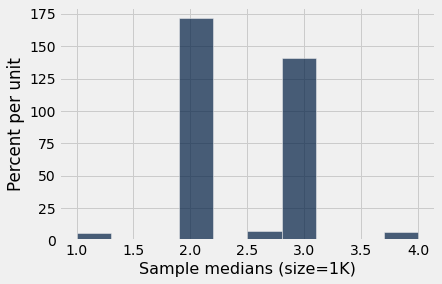

In [26]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist()
# what are some things you take away from the histogram below?
# what is it telling you?

# 

#### Empirical Distributions Overlayed

In [38]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2

for i in np.arange(num_simulations):
    
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)
    print('loop number:',i)
    print(sample_medians_10)
    print(sample_medians_100)
    print(sample_medians_1000)


loop number: 0
[0.]
[2.]
[2.]
loop number: 1
[0. 0.]
[2. 4.]
[2. 3.]


In [34]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)
sample_medians

Size 10,Size 100,Size 1000
-5,2,2


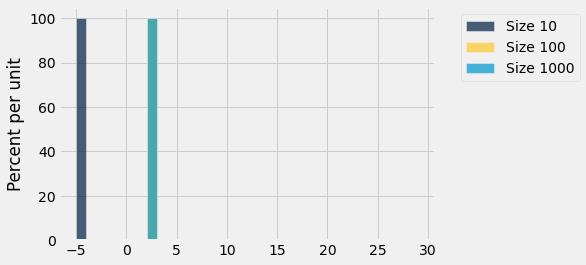

In [35]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [39]:
population_proportions = make_array(.26, .74) # recreate the Talladega County demographic breakdown
# 26% of the residents in the county were black, #74% were non-black
population_proportions

array([0.26, 0.74])

In [42]:
sample_proportions(100, population_proportions)

array([0.26, 0.74])

In [43]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [47]:
panel_proportion()

0.26

In [48]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

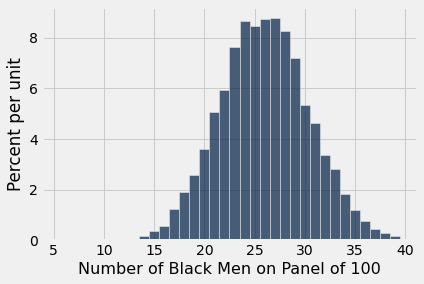

In [54]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

# what information can you extract from the histogram below?
# how would you describe the shape of our distribution below?
# where is it centered?
# what is the width of our distribution?


## Mendel and Pea Flowers ##

In [55]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [56]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.74919268, 0.25080732])

In [58]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [65]:
purple_flowers()

77.07212055974165

In [66]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

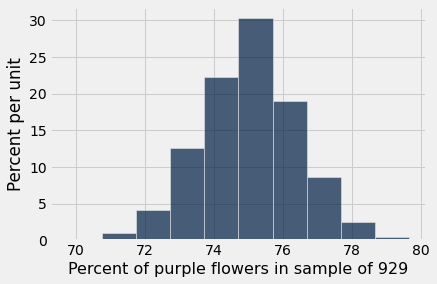

In [68]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

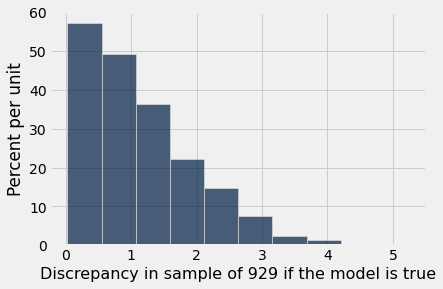

In [69]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [70]:
abs(observed_purples * 100 - 75)

1.318622174381062